In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
from create_training_data import *

In [11]:
model = load_model("model.h5")

In [12]:
def process_single_image(image_path, output_size):
    img = Image.open(image_path).convert('L')  # 將圖片轉為灰階
    img_resized = img.resize(output_size)
    img_array = np.array(img_resized) / 255 # 歸一化到 [0, 1]
    return img_array

In [13]:
# 單一圖片路徑
fingerprint_path = "./DB4_B/104_1.tif"

# 圖片大小設定
output_size = (160, 160)

# 處理圖片
processed_image = process_single_image(fingerprint_path, output_size=output_size)
# processed_image = processed_image[20:-20, 20:-20]
processed_image = np.expand_dims(processed_image, axis=(0, -1))  # Shape: (1, 160, 160, 1)

1/1 [==============================] - 0s 154ms/step


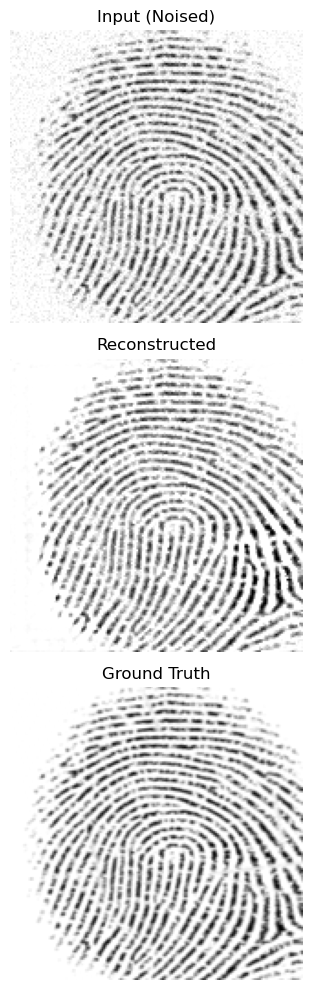

In [14]:
# 預測 (noise)
noised_img = np.clip(processed_image + np.random.normal(0, 0.05, processed_image.shape), 0., 1.)
# noised_img = processed_image
reconstructed_image = model.predict(noised_img)
reconstructed_image[0, :, :, 0] = sharpen(reconstructed_image[0, :, :, 0])
# reconstructed_image[0, :, :, 0] = cv2.erode(reconstructed_image[0, :, :, 0], np.ones((2,2), np.uint8), iterations=2)

fig, ax = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)
ax[0].imshow(noised_img[0, :, :, 0], cmap='gray')
ax[0].set_title("Input (Noised)")
ax[0].axis('off')

ax[1].imshow(reconstructed_image[0, :, :, 0], cmap='gray')
ax[1].set_title("Reconstructed")
ax[1].axis('off')

ax[2].imshow(processed_image[0, :, :, 0], cmap='gray')
ax[2].set_title("Ground Truth")
ax[2].axis('off')

plt.tight_layout()
# plt.show()
plt.savefig('compare_noise.png')
plt.show()

1/1 [==============================] - 0s 35ms/step


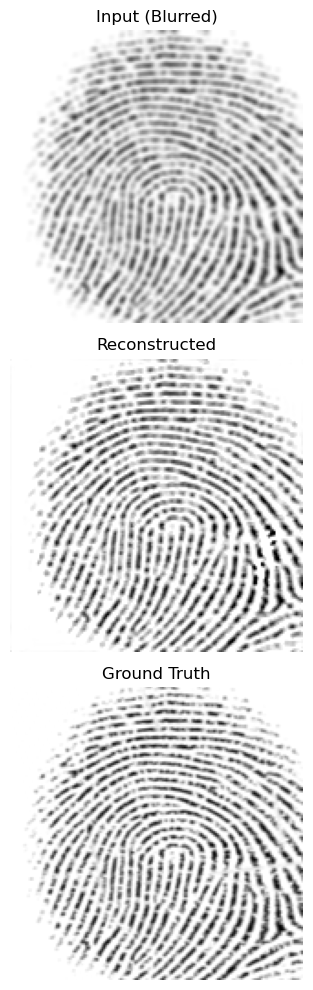

In [15]:
# 預測 (blur)
blur_img = np.empty(processed_image.shape)
blur_img[0, :, :, 0] = np.clip(blur(processed_image[0, :, :, 0]), 0., 1.)
# blur_img = processed_image
reconstructed_image = model.predict(blur_img)
reconstructed_image[0, :, :, 0] = sharpen(reconstructed_image[0, :, :, 0])
# reconstructed_image[0, :, :, 0] = cv2.erode(reconstructed_image[0, :, :, 0], np.ones((2,2), np.uint8), iterations=2)

fig, ax = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)
ax[0].imshow(blur_img[0, :, :, 0], cmap='gray')
ax[0].set_title("Input (Blurred)")
ax[0].axis('off')

ax[1].imshow(reconstructed_image[0, :, :, 0], cmap='gray')
ax[1].set_title("Reconstructed")
ax[1].axis('off')

ax[2].imshow(processed_image[0, :, :, 0], cmap='gray')
ax[2].set_title("Ground Truth")
ax[2].axis('off')

plt.tight_layout()
# plt.show()
plt.savefig('compare_blur.png')
plt.show()

1/1 [==============================] - 0s 40ms/step


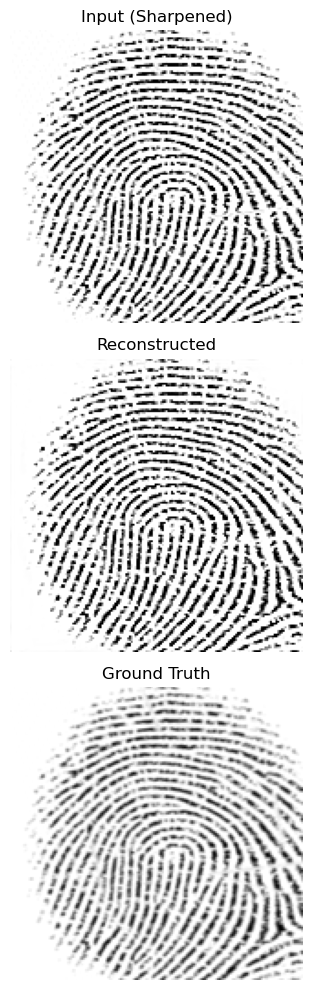

In [16]:
# 預測 (sharp)
sharp_img = np.empty(processed_image.shape)
sharp_img[0, :, :, 0] = np.clip(sharpen(processed_image[0, :, :, 0]), 0., 1.)
# sharp_img = processed_image
reconstructed_image = model.predict(sharp_img)
reconstructed_image[0, :, :, 0] = sharpen(reconstructed_image[0, :, :, 0])

fig, ax = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)
ax[0].imshow(sharp_img[0, :, :, 0], cmap='gray')
ax[0].set_title("Input (Sharpened)")
ax[0].axis('off')

ax[1].imshow(reconstructed_image[0, :, :, 0], cmap='gray')
ax[1].set_title("Reconstructed")
ax[1].axis('off')

ax[2].imshow(processed_image[0, :, :, 0], cmap='gray')
ax[2].set_title("Ground Truth")
ax[2].axis('off')

plt.tight_layout()
# plt.show()
plt.savefig('compare_sharp.png')
plt.show()

1/1 [==============================] - 0s 56ms/step


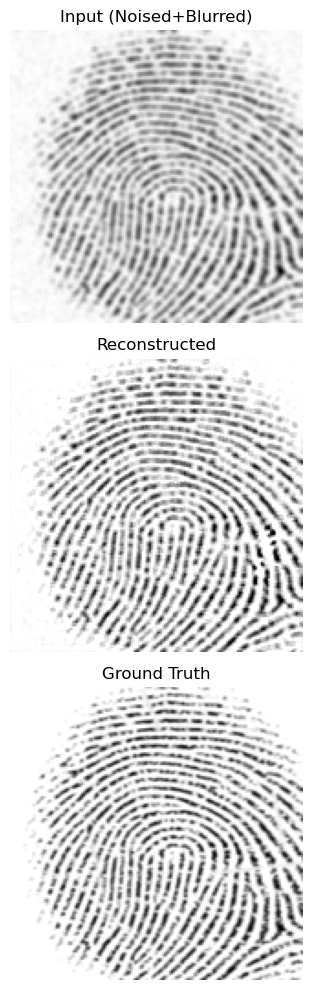

In [17]:
# 預測 (noise+blur)
noise_blur_img = np.clip(processed_image + np.random.normal(0, 0.05, processed_image.shape), 0., 1.)
noise_blur_img[0, :, :, 0] = np.clip(blur(noise_blur_img[0, :, :, 0]), 0., 1.)
# noise_blur_img = processed_image
reconstructed_image = model.predict(noise_blur_img)
reconstructed_image[0, :, :, 0] = sharpen(reconstructed_image[0, :, :, 0])

fig, ax = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)
ax[0].imshow(noise_blur_img[0, :, :, 0], cmap='gray')
ax[0].set_title("Input (Noised+Blurred)")
ax[0].axis('off')

ax[1].imshow(reconstructed_image[0, :, :, 0], cmap='gray')
ax[1].set_title("Reconstructed")
ax[1].axis('off')

ax[2].imshow(processed_image[0, :, :, 0], cmap='gray')
ax[2].set_title("Ground Truth")
ax[2].axis('off')

plt.tight_layout()
# plt.show()
plt.savefig('compare_noise_blur.png')
plt.show()

1/1 [==============================] - 0s 49ms/step


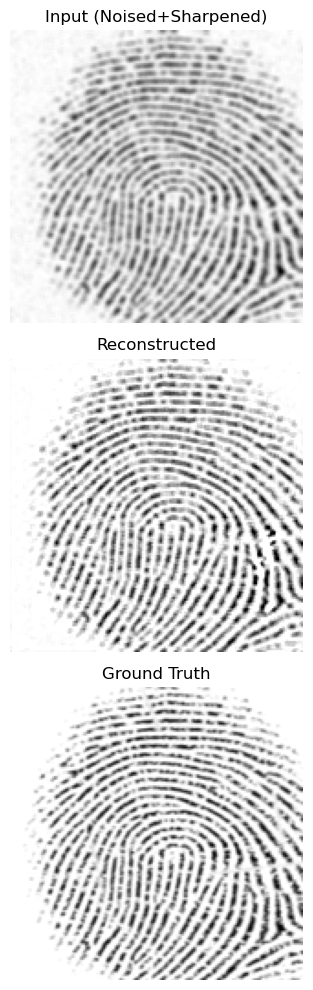

In [18]:
# 預測 (noise+sharp)
noise_sharp_img = np.clip(processed_image + np.random.normal(0, 0.05, processed_image.shape), 0., 1.)
noise_sharp_img[0, :, :, 0] = np.clip(blur(noise_sharp_img[0, :, :, 0]), 0., 1.)
# noise_sharp_img = processed_image
reconstructed_image = model.predict(noise_sharp_img)
reconstructed_image[0, :, :, 0] = sharpen(reconstructed_image[0, :, :, 0])

fig, ax = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)
ax[0].imshow(noise_sharp_img[0, :, :, 0], cmap='gray')
ax[0].set_title("Input (Noised+Sharpened)")
ax[0].axis('off')

ax[1].imshow(reconstructed_image[0, :, :, 0], cmap='gray')
ax[1].set_title("Reconstructed")
ax[1].axis('off')

ax[2].imshow(processed_image[0, :, :, 0], cmap='gray')
ax[2].set_title("Ground Truth")
ax[2].axis('off')

plt.tight_layout()
# plt.show()
plt.savefig('compare_noise_sharp.png')
plt.show()